## OCNS 2019, Simulating dendrites at different levels of abstraction.
## Exercise 1a: How inputs propagate to the soma and how inputs interact.
### In this exercise we will see (i) how inputs attenuate towards the soma, and (ii) how inputs integrate in a dendritic branch. 

In [1]:
# -*- coding: utf-8 -*-
from neuron import h, gui
from matplotlib import pyplot as plt
% matplotlib inline

#Simulation parameters	
h.tstop = 100               # ms
h.dt = 0.1                  # ms
h.steps_per_ms = 10         # For plotting-should be compartible with dt
h.v_init = -65              # initial membrane potential
fs = 14                     # font size for plots

### Create a soma and two dendrites, define their anatomical and biophysical properties and connect them.

In [2]:
# create three compartments using the command h.Section()
soma = h.Section(name='soma')
dend0, dend1 = [h.Section(name=n) for n in ['dend0', 'dend1']]

# Define properties of soma
soma.diam = 20         # um (micro-meter)
soma.L = 200           # um
soma.Ra = 100          # axial resistance in Ohm * cm
soma.cm = 1            # specific membrane capacitance, capacitance per unit of membrane, uF/cm^2   
soma.nseg = 1          # number of segments (spatial grid)

# Insert Hodgkin-Huxley channels (including leak)
soma.insert('hh')
for seg in soma: 
    seg.hh.gnabar = 0.12   # Sodium conductance in S/cm2
    seg.hh.gkbar = 0.036   # Potassium conductance in S/cm2
    seg.hh.gl = 0.0003     # Leak conductance in S/cm2
    seg.hh.el = -65        # Reversal potential in mV

# Define properties of first dendritic compartment (dend0)
dend0.diam = 5
dend0.L = 500
dend0.nseg=11
dend0.cm = 1
dend0.Ra = 100

# Insert passive (leak) channels (the dendrites have no active conductances for now)
dend0.insert('pas')      
for seg in dend0:
    seg.pas.e= -65        # Reversal potential in mV
    seg.pas.g= 0.0003     # Leak conductance in S/cm2

# Define properties of second dendritic compartment (dend1)
dend1.diam = 3
dend1.L = 200
dend1.nseg=13
dend1.cm = 1
dend1.Ra = 100

#Insert passive (leak) channels again
dend1.insert('pas')     
for seg in dend1:
    seg.pas.e= -65
    seg.pas.g= 0.0003

# Connect the three compartments together
dend0.connect(soma(0),0)    # 0 point of dendrite 0 to the zero point of the soma     
dend1.connect(dend0(1),0)   # 0 point of dendrite 1 to the zero point of dendrite 0

dend1

### Synaptic Stimulation

In [5]:
Syn=h.ExpSyn(dend1(0.5))     # Place the synapse to the middle (0.5) of the soma
Syn.e=0                     # Reverse potential of the synapse (mV)

# Create an artificial spike using h.NetStim() (an "event" to be delivered to the synapse)...
ns=h.NetStim(0.5)
ns.start = 50         # time when the spike arrives (in msec)     
ns.number = 1         # number of spikes (just one)

# ... and connect the event to the synapse.
nc = h.NetCon(ns, Syn, -10, 2, 0.008*1)   # function arguments: NetCon(source, target, threshold, delay, weight)

### Example simulation
#### Calculate and print in terminal the depolarization at the soma and at the middle part of the distal dendrite (dend1)

('Somatic depolarization is ', 0.17, ' mV')
('Distal Dendritic depolarization is', 3.24, 'mV')


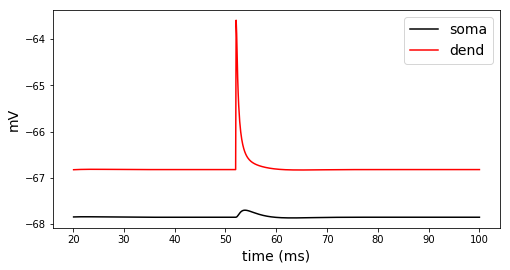

In [6]:
vsoma_vec = h.Vector()         # Membrane potential vector
vdend1_vec = h.Vector()        # Membrane potential vector
t_vec = h.Vector()             # Time stamp vector

# record the appropriate variables from simulation
# note that all variables (vname) must be accessed with ._ref_vname
vsoma_vec.record(soma(0.5)._ref_v)   
vdend1_vec.record(dend1(0.5)._ref_v)
t_vec.record(h._ref_t)

# Run the simulation
h.run()

# Remove the first 20 msec of simulation (just to make the plots nicer!)
vsoma_vec.remove(0,200)
vdend1_vec.remove(0,200)
t_vec.remove(0,200)

# Plot the results
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
soma_plot = plt.plot(t_vec, vsoma_vec, color='black')
dend_plot = plt.plot(t_vec, vdend1_vec, color='red')

plt.legend(soma_plot + dend_plot, ['soma', 'dend'], fontsize=fs)
plt.xlabel('time (ms)', fontsize=fs)
plt.ylabel('mV', fontsize=fs)

print ('Somatic depolarization is ',  round(vsoma_vec.max()-vsoma_vec.min(),2), ' mV')
print ('Distal Dendritic depolarization is', round(vdend1_vec.max()-vdend1_vec.min(),2), 'mV')

### Task 1: How can you easily make this synapse inhibitory?

### Task 2: Move the synapse to the middle of dendrite[1] section.
### What do you expect for the amplitude and the duration of the EPSP seen at the dendrite and at the soma?

!['Every input for itself (the passive dendritic tree)'](Picture1.png)
#### Spruston, Nature Reviews, 2008

### Task 3: Insert 1 to 5 synapses like this one in the same location. In this case, this is equivalent to increasing the weight 1 to 5 times.
### What is the expected (arithmetic sum) versus actual (simulated output)?
### Is their relationship linear? 
![''](Picture2.jpg)